# Question 1:
1. Use the User dataset perform Random Forest and compare with Decision Tree.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv('User_Data - Arindam Dev.csv')

In [5]:
data.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
data['Purchased'].unique()

array([0, 1])

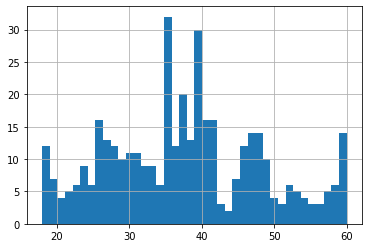

In [8]:
data['Age'].hist(bins=40)

In [9]:
data[['EstimatedSalary','Gender']].groupby('Gender').mean().round()

,EstimatedSalary
Gender,
Female,71760.0
Male,67643.0


In [10]:
data.shape

(400, 5)

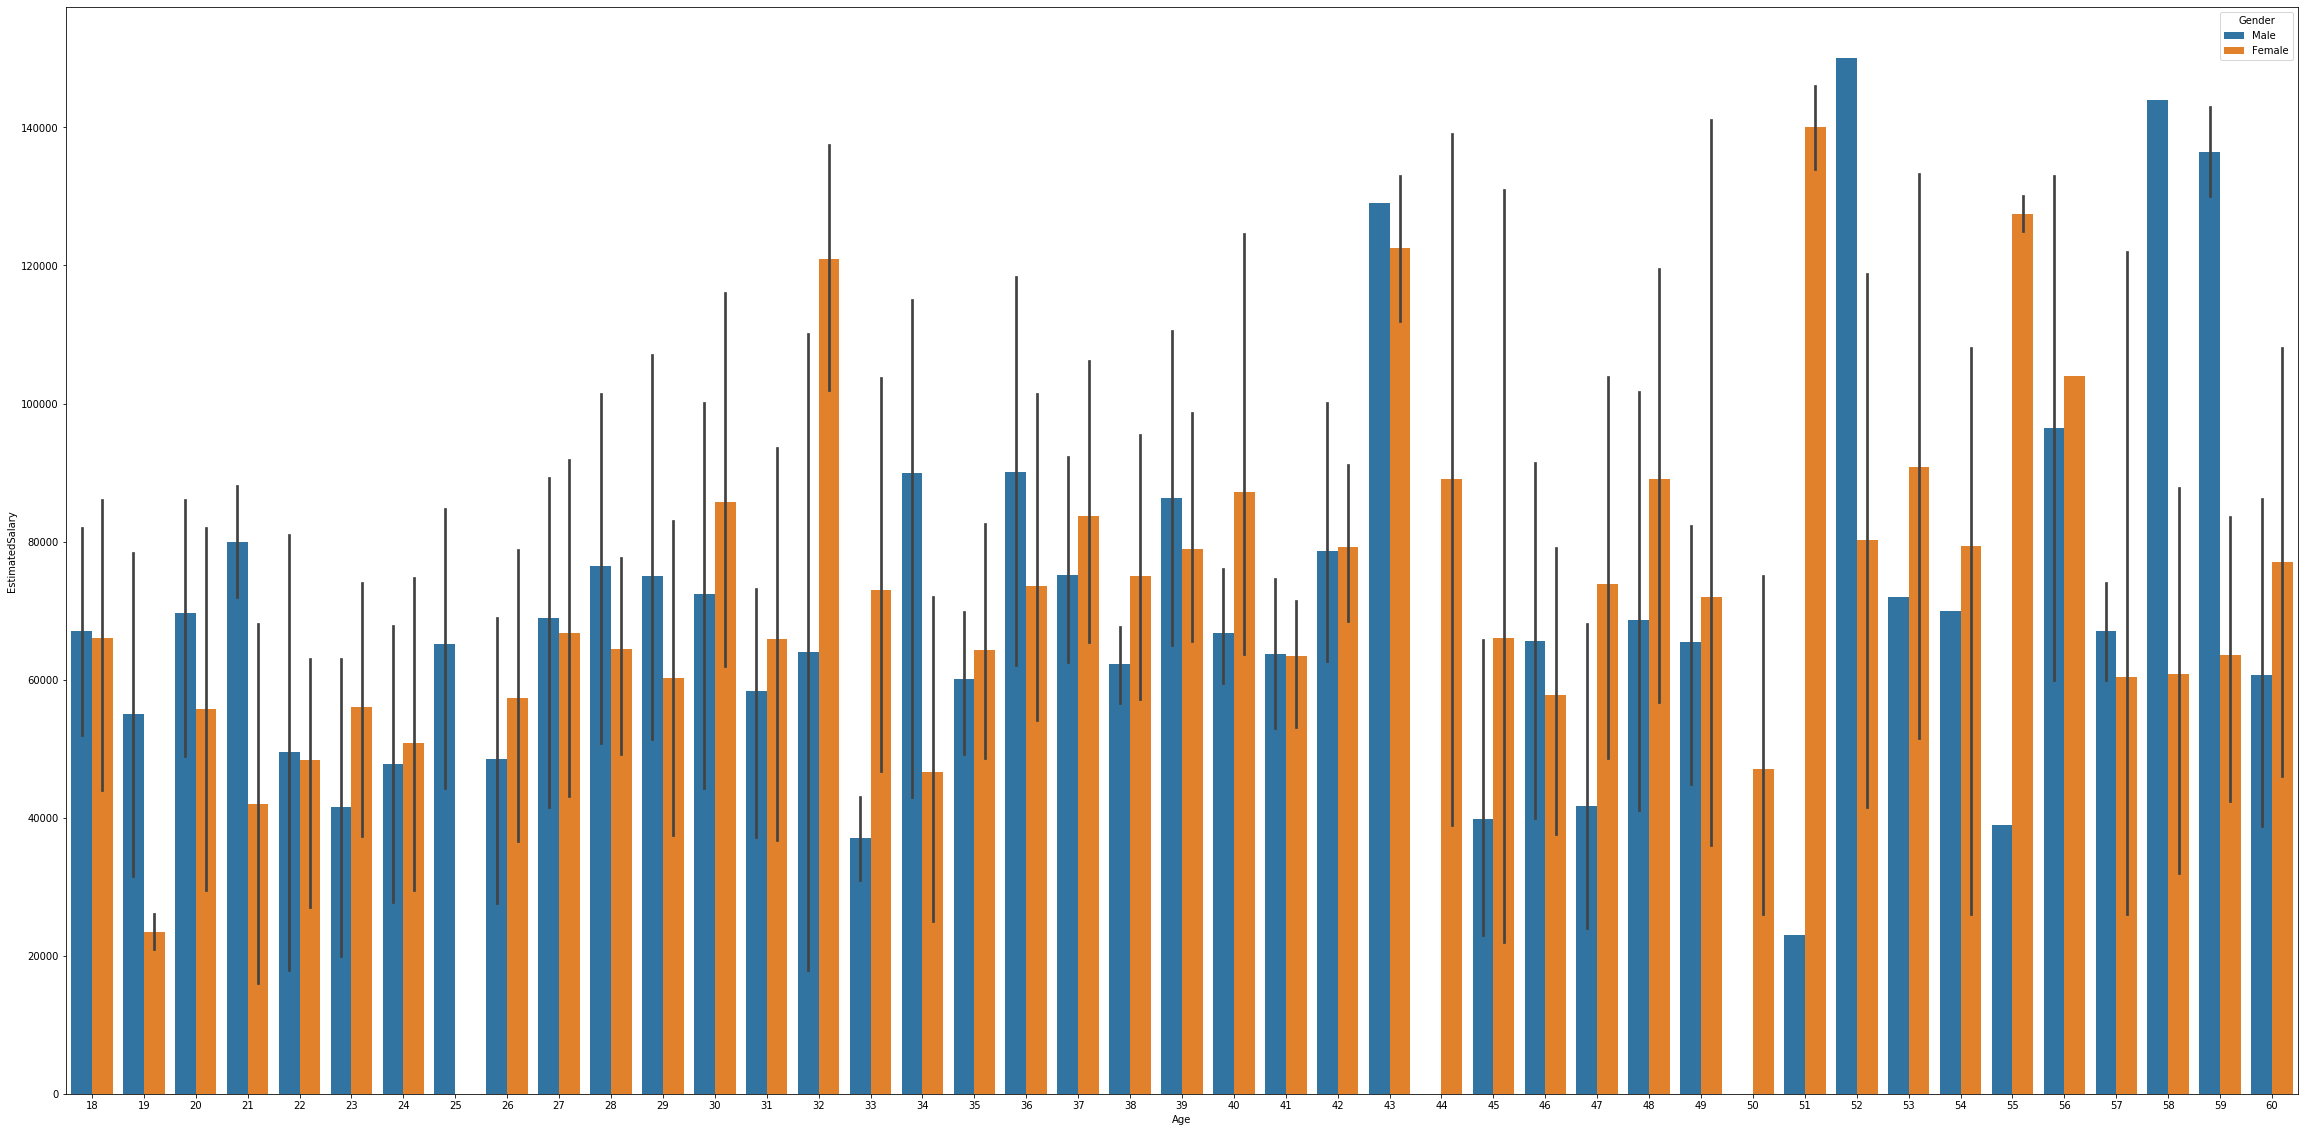

In [12]:
plt.figure(figsize=[40,20])
sns.barplot(x='Age',y='EstimatedSalary',hue='Gender',data=data)

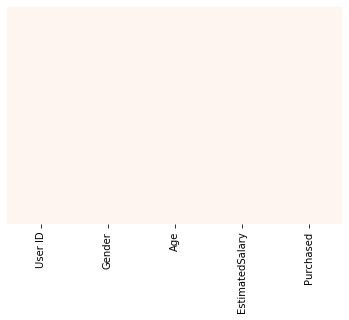

In [14]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='Reds')

In [16]:
pd.get_dummies(data['Gender'])

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
395,1,0
396,0,1
397,1,0
398,0,1


In [17]:
male=pd.get_dummies(data['Gender'],drop_first=True)

In [18]:
male

,Male
0,1
1,1
2,0
3,0
4,1
...,...
395,0
396,1
397,0
398,1


In [21]:
data=pd.concat([data,male],axis=1)

In [22]:
data.drop('Gender',axis=1,inplace=True)

In [23]:
data.head()

,User ID,Age,EstimatedSalary,Purchased,Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1


In [24]:
data.drop('User ID',axis=1,inplace=True)

In [25]:
data.head()

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [61]:
x=data.drop('Purchased',axis=1).values
# x=data.drop(['Purchased','Male'],axis=1).values
y=data['Purchased'].values

In [62]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.2,random_state=10)

In [63]:
normalization=StandardScaler()
xtrain=normalization.fit_transform(xtrain)
xtest=normalization.fit_transform(xtest)

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn import tree

In [65]:
# deci_tree=DecisionTreeClassifier(max_depth=3,random_state=0)
# deci_tree.fit(xtrain,ytrain)
deci_tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
deci_tree.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [66]:
y_predict=deci_tree.predict(xtest)

In [67]:
print('accuracy : ',accuracy_score(ytest,y_predict))

accuracy :  0.875


In [68]:
print(confusion_matrix(ytest,y_predict))

[[189  18]
 [ 22  91]]


[Text(155.44285714285715, 205.35999999999999, 'X[0] <= 0.288\nentropy = 0.954\nsamples = 80\nvalue = [50, 30]'),
 Text(71.74285714285715, 181.2, 'X[1] <= 1.3\nentropy = 0.529\nsamples = 50\nvalue = [44, 6]'),
 Text(47.82857142857143, 157.04, 'X[1] <= 0.261\nentropy = 0.258\nsamples = 46\nvalue = [44, 2]'),
 Text(23.914285714285715, 132.88, 'entropy = 0.0\nsamples = 35\nvalue = [35, 0]'),
 Text(71.74285714285715, 132.88, 'X[0] <= -0.39\nentropy = 0.684\nsamples = 11\nvalue = [9, 2]'),
 Text(47.82857142857143, 108.72, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(95.65714285714286, 108.72, 'X[0] <= -0.073\nentropy = 1.0\nsamples = 4\nvalue = [2, 2]'),
 Text(71.74285714285715, 84.56, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(119.57142857142857, 84.56, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(95.65714285714286, 157.04, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(239.14285714285714, 181.2, 'X[0] <= 1.192\nentropy = 0.722\nsamples = 30\nvalue = [6, 24]'

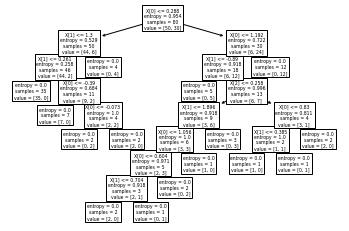

In [70]:
tree.plot_tree(deci_tree)

In [72]:
text_representation=tree.export_text(deci_tree)
print(text_representation)

|--- feature_0 <= 0.29
|   |--- feature_1 <= 1.30
|   |   |--- feature_1 <= 0.26
|   |   |   |--- class: 0
|   |   |--- feature_1 >  0.26
|   |   |   |--- feature_0 <= -0.39
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  -0.39
|   |   |   |   |--- feature_0 <= -0.07
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  -0.07
|   |   |   |   |   |--- class: 0
|   |--- feature_1 >  1.30
|   |   |--- class: 1
|--- feature_0 >  0.29
|   |--- feature_0 <= 1.19
|   |   |--- feature_1 <= -0.89
|   |   |   |--- class: 1
|   |   |--- feature_1 >  -0.89
|   |   |   |--- feature_2 <= 0.26
|   |   |   |   |--- feature_1 <= 1.90
|   |   |   |   |   |--- feature_0 <= 1.06
|   |   |   |   |   |   |--- feature_0 <= 0.60
|   |   |   |   |   |   |   |--- feature_1 <= 0.70
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_1 >  0.70
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_0 >  0.60
|   |   |   |   | 

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
random_f=RandomForestClassifier(n_estimators=30)
random_f.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [107]:
predict=random_f.predict(xtest)

In [108]:
print('accuracy : ',accuracy_score(ytest,predict))

accuracy :  0.90625


In [109]:
print(confusion_matrix(ytest,predict))

[[191  16]
 [ 14  99]]
